In [24]:
import os
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
import warnings
import time
import csv
import Map

#Todo
# 3rd Party Pov


In [25]:
warnings.filterwarnings("ignore", message="Skipping variable loading for optimizer 'rmsprop'")
model = load_model('C:\\Users\\siddu\\Desktop\\Local\\Module-Z(Pothole)\\Models\\Ptz.keras')

In [26]:
def predictImg(imgpath):
    predict_image = image.load_img(imgpath, target_size = (64,64))
    predict_image = image.img_to_array(predict_image)
    predict_image = np.expand_dims(predict_image, axis=0)
    result = model.predict(predict_image)
    x = result.max()

    plt.imshow(cv2.imread(imgpath, cv2.IMREAD_GRAYSCALE), cmap='gray')
    plt.axis('off')
    plt.show()
    
    if x == 0:
        return("Normal")
    else:
        return("Pothole")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


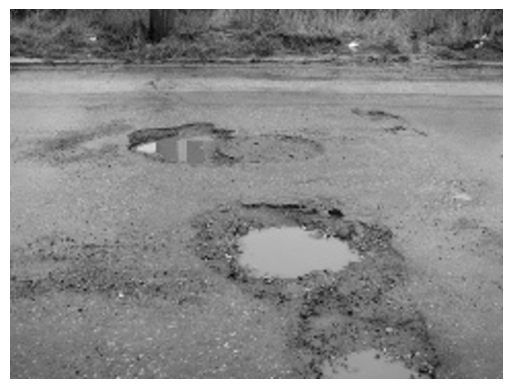

-------------------------------------------
|               ALERT: POTHOLE             |
-------------------------------------------
Status: Detected
Coordinates: (12.933998,  77.538849)
Mapping the pothole on the local map...
Map updated successfully!
-------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


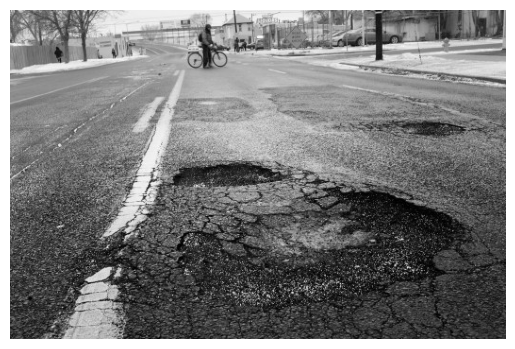

-------------------------------------------
|               ALERT: POTHOLE             |
-------------------------------------------
Status: Detected
Coordinates: (12.932508,  77.541301)
Mapping the pothole on the local map...
Map updated successfully!
-------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


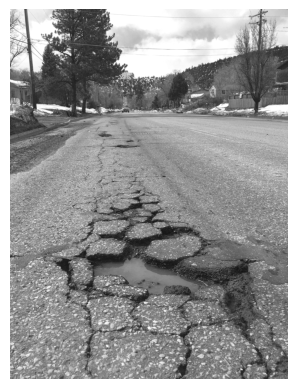

-------------------------------------------
|               ALERT: POTHOLE             |
-------------------------------------------
Status: Detected
Coordinates: (12.932384,  77.541238)
Mapping the pothole on the local map...
Map updated successfully!
-------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


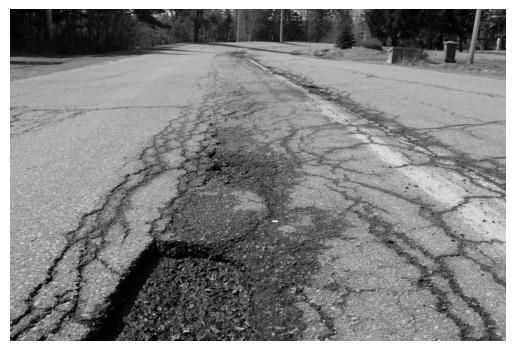

-------------------------------------------
|               ALERT: POTHOLE             |
-------------------------------------------
Status: Detected
Coordinates: (12.930987,  77.543212)
Mapping the pothole on the local map...
Map updated successfully!
-------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


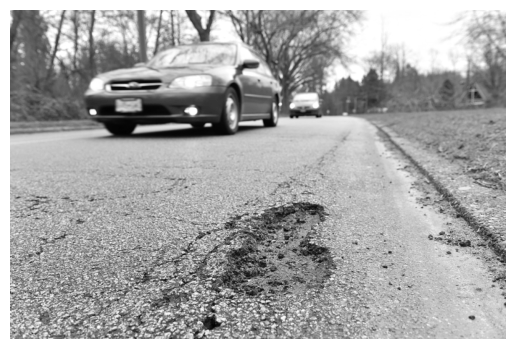

-------------------------------------------
|               ALERT: POTHOLE             |
-------------------------------------------
Status: Detected
Coordinates: (12.929498,  77.545186)
Mapping the pothole on the local map...
Map updated successfully!
-------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


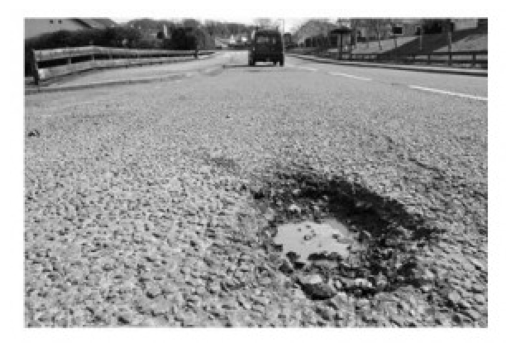

-------------------------------------------
|               ALERT: POTHOLE             |
-------------------------------------------
Status: Detected
Coordinates: (12.927449,  77.547096)
Mapping the pothole on the local map...
Map updated successfully!
-------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


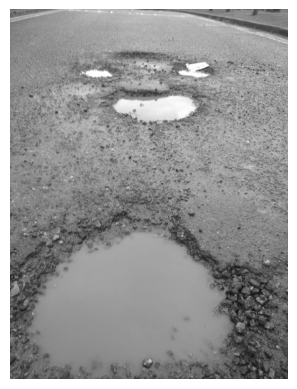

-------------------------------------------
|               ALERT: POTHOLE             |
-------------------------------------------
Status: Detected
Coordinates: (12.926084,  77.548911)
Mapping the pothole on the local map...
Map updated successfully!
-------------------------------------------


In [27]:
folder_path = "C:\\Users\\siddu\\Desktop\\Local\\Module-Z(Pothole)\\data\\potholes"
photo_files = os.listdir(folder_path)
selected_photos = random.sample(photo_files, 7)

fh = open("C:\\Users\\siddu\\Desktop\\Local\\Module-Z(Pothole)\\co-ords.csv","r")
reader = csv.reader(fh)
coordinates = list()

for i in reader:
    coordinates.append(i)

count = 0 
for photo in selected_photos:
    image_path = os.path.join(folder_path, photo)
    x = predictImg(image_path)
    count += 1
    cord = coordinates[count]
    x,y = cord[0], cord[1]

    """print(f"\033[1;32;40mA pothole has been detected at coordinates ({x}, {y})!\033[0m")
    print("\033[1;34;40mMapping the pothole on the local map...\033[0m")"""

    print("\033[1;33;40m-------------------------------------------\033[0m")
    print("\033[1;33;40m|               ALERT: POTHOLE             |\033[0m")
    print("\033[1;33;40m-------------------------------------------\033[0m")
    print("\033[1;32;40mStatus: Detected\033[0m")
    print(f"\033[1;32;40mCoordinates: ({x}, {y})\033[0m")
    print("\033[1;34;40mMapping the pothole on the local map...\033[0m")
    time.sleep(2)  # Simulate mapping process
    print("\033[1;34;40mMap updated successfully!\033[0m")
    print("\033[1;33;40m-------------------------------------------\033[0m")

Map.Map()